# Result Analysis

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("result.csv")
df["Memory"] = df["Memory"] / 1024
df.head()

,Algorithm,Size,Cycle,Time,Memory
0,RUNNING,1000000,0,0.20,16.281250
1,REVERSE,1000000,0,0.17,16.261719
2,POINTSELF,1000000,0,0.43,47.406250
3,RUNNING,1000000,0,0.20,16.265625
4,REVERSE,1000000,0,0.18,16.261719


In [2]:
def get_time(df, size, cycle):
    return np.mean(df[
            (df["Size"] == size) & (df["Cycle"] == cycle)
        ]["Time"])
def get_memory(df, size, cycle):
    return np.mean(df[
            (df["Size"] == size) & (df["Cycle"] == cycle)
        ]["Memory"])
def merge(df):
    df2 = []
    sizes = [1000000, 2000000, 4000000, 6000000, 8000000,
             10000000, 20000000, 30000000, 40000000, 50000000]
    for s in sizes:
        for i in range(0, 10):
            c = s / 10 * i
            x = { "Size": s, "Cycle": c }
            x["Time"] = get_time(df, s, c)
            x["Memory"] = get_memory(df, s, c)
            df2.append(x)
    df2 = pd.DataFrame(df2)
    return df2         
df_running = merge(df[df["Algorithm"] == "RUNNING"])
df_reverse = merge(df[df["Algorithm"] == "REVERSE"])
df_pointself = merge(df[df["Algorithm"] == "POINTSELF"])

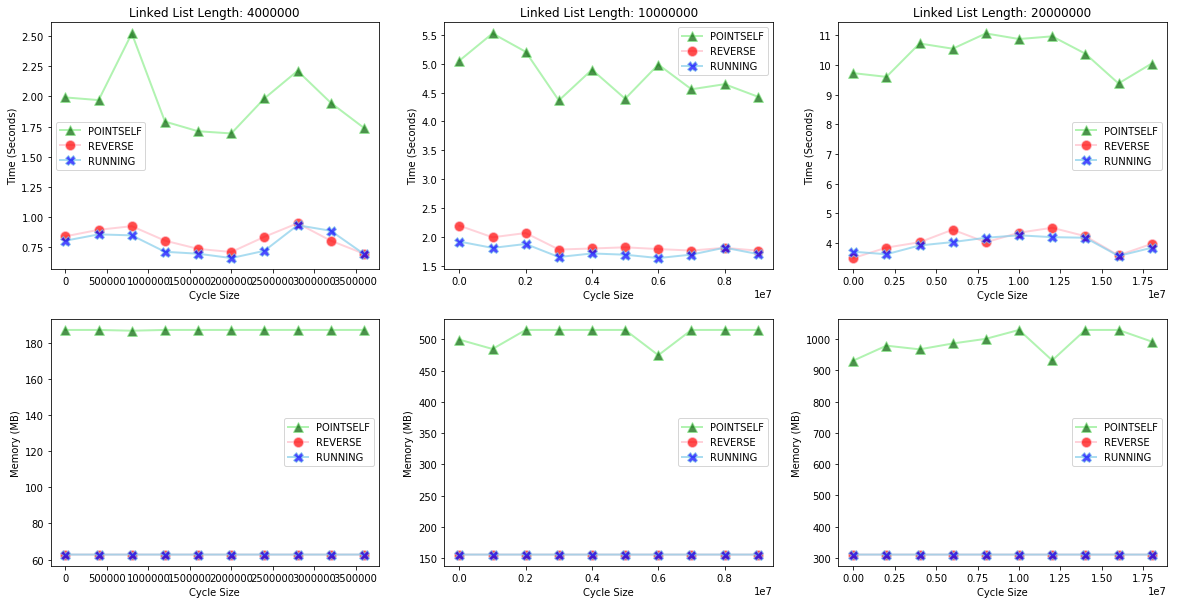

In [3]:
import matplotlib.pyplot as plt
def plot(ax, t, size):
    ax.plot('Cycle', t, data=df_pointself[df_pointself["Size"]==size], 
        marker='^', markerfacecolor='darkgreen', markersize=10, color='lightgreen', 
        alpha=0.7, linewidth=2, label="POINTSELF")
    ax.plot('Cycle', t, data=df_reverse[df_reverse["Size"]==size], 
        marker='o', markerfacecolor='red', markersize=10, color='pink', 
        alpha=0.7, linewidth=2, label="REVERSE")
    ax.plot('Cycle', t, data=df_running[df_running["Size"]==size], 
        marker='X', markerfacecolor='blue', markersize=10, color='skyblue', 
        alpha=0.7, linewidth=2, label="RUNNING")
    ax.set_xlabel("Cycle Size")
    if t == "Time":
        ax.set_ylabel("Time (Seconds)")
        ax.set_title("Linked List Length: {}".format(size))
    elif t == "Memory":
        ax.set_ylabel("Memory (MB)")
    ax.legend()  
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, t in enumerate(["Time", "Memory"]):
    for j, size in enumerate([4000000, 10000000, 20000000]):
        plot(axes[i][j], t, size)
fig.savefig("fig.pdf".format(t, size), bbox_inches="tight")

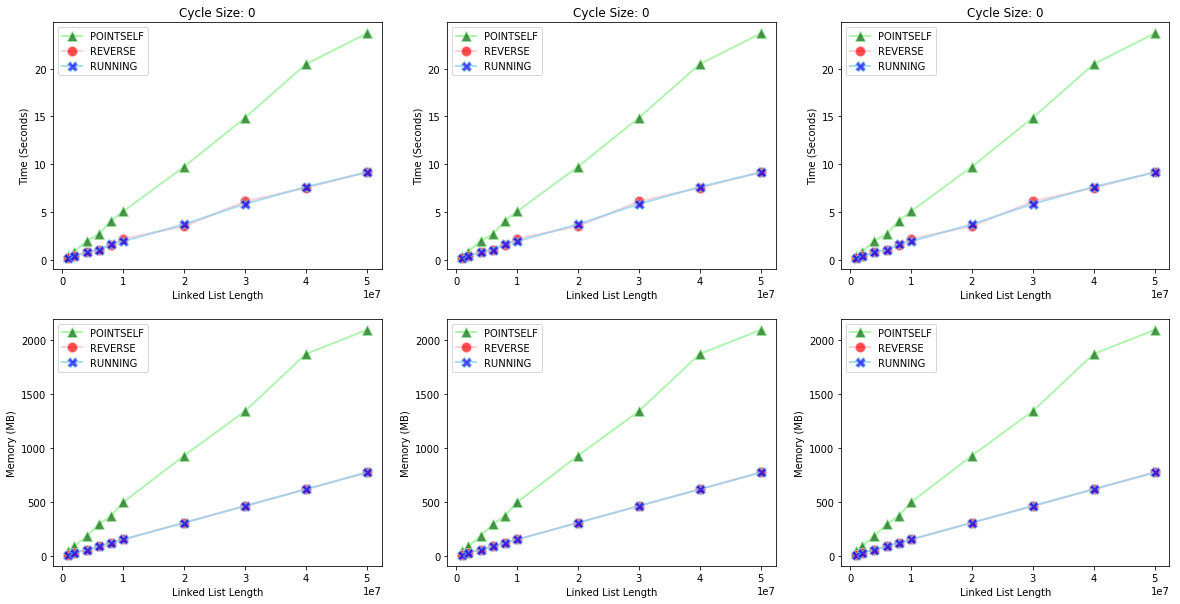

In [4]:
import matplotlib.pyplot as plt
def plot2(ax, t, cycle):
    ax.plot('Size', t, data=df_pointself[df_pointself["Cycle"]==cycle], 
        marker='^', markerfacecolor='darkgreen', markersize=10, color='lightgreen', 
        alpha=0.7, linewidth=2, label="POINTSELF")
    ax.plot('Size', t, data=df_reverse[df_reverse["Cycle"]==cycle], 
        marker='o', markerfacecolor='red', markersize=10, color='pink', 
        alpha=0.7, linewidth=2, label="REVERSE")
    ax.plot('Size', t, data=df_running[df_running["Cycle"]==cycle], 
        marker='X', markerfacecolor='blue', markersize=10, color='skyblue', 
        alpha=0.7, linewidth=2, label="RUNNING")
    ax.set_xlabel("Linked List Length")
    if t == "Time":
        ax.set_ylabel("Time (Seconds)")
        ax.set_title("Cycle Size: {}".format(cycle))
    elif t == "Memory":
        ax.set_ylabel("Memory (MB)")
    ax.legend()  
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, t in enumerate(["Time", "Memory"]):
    for j, cycle in enumerate([0, 0, 0]):
        plot2(axes[i][j], t, cycle)
fig.savefig("fig2.pdf".format(t, size), bbox_inches="tight")